In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Hopping rate

In [10]:
f=6.935e9 #Hz
f_ghz=6.935 #GHz
C=5.3e-15 #F
l = (16.8 + 0.013)*1e-3 # m
C_l = 1.7e-10 #F/m
Z = 49

t = -(1/2 * f*C*2/(C_l*l))*1e-9
t1 = -(C * f**2 * Z)*1e-9
print(t,t1)

-0.012859621931208695 -0.0124900702325


# Eigenvalues

In [7]:
indexes = [(0,1),(1,2),(0,2),(1,0),(2,1),(2,0)]

ALG = np.zeros((3,3))
i = 0

for i in range(0,6):
    ALG[indexes[i][0]][indexes[i][1]] = 1

ALG

array([[0., 1., 1.],
       [1., 0., 1.],
       [1., 1., 0.]])

In [8]:
# list of eigenvalues

ev = np.sort(np.linalg.eigvals(ALG))
ev

array([-1., -1.,  2.])

In [11]:
# The expected frequencies

diagonal = f_ghz*np.ones(3)
H = -t*ALG
np.fill_diagonal(H,diagonal)

eigenv = np.sort(np.linalg.eigvals(H))
print(H, eigenv)

[[6.935      0.01285962 0.01285962]
 [0.01285962 6.935      0.01285962]
 [0.01285962 0.01285962 6.935     ]] [6.92214038 6.92214038 6.96071924]


# Simulation results

6.93787575150301

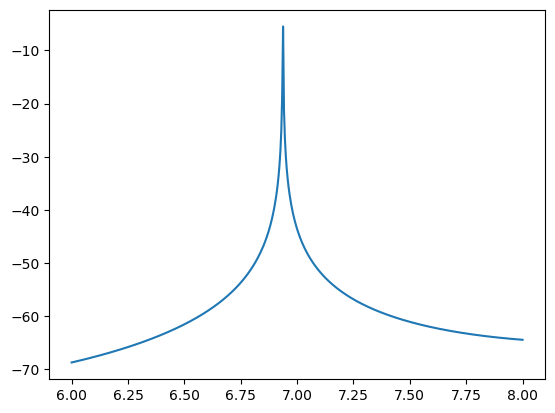

In [4]:
sim = np.loadtxt('Simulation results/Resonator 3 - S21 dB.txt').T
plt.plot(sim[0],sim[1])

indice_max = np.argmax(sim[1])
x_max = sim[0][indice_max]
x_max

6.93386773547094

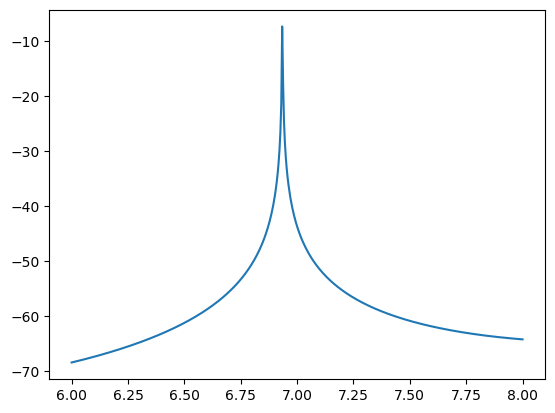

In [5]:
sim = np.loadtxt('Simulation results/Resonator 2 - S21 dB.txt').T
plt.plot(sim[0],sim[1])

indice_max = np.argmax(sim[1])
x_max = sim[0][indice_max]
x_max

Text(0, 0.5, 'dB')

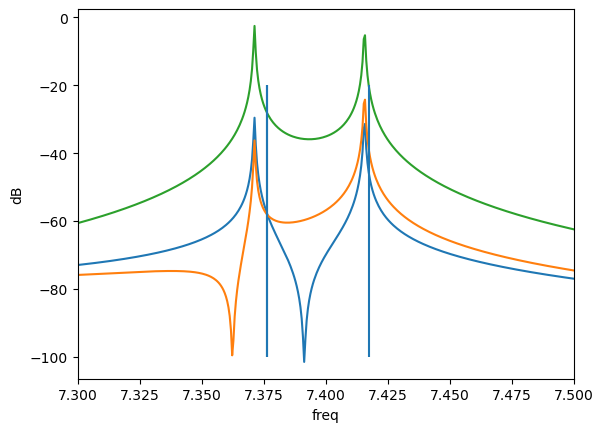

In [99]:
coupled = np.loadtxt('Simulation results/Three coupled resonators S21 dB.txt').T
plt.plot((coupled[0]),coupled[1])
coupled = np.loadtxt('Simulation results/Three coupled resonators S31 dB.txt').T
plt.plot((coupled[0]),coupled[1])
coupled = np.loadtxt('Simulation results/Three coupled resonators S32 dB.txt').T
plt.plot((coupled[0]),coupled[1])
plt.xlim(7.3,7.5)

plt.vlines(eigenv,-20,-100)

plt.xlabel('freq')
plt.ylabel('dB')

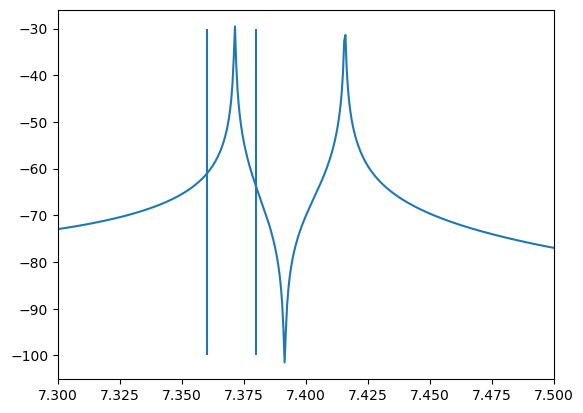

In [78]:
coupled = np.loadtxt('Simulation results/Three coupled resonators S21 dB.txt').T
plt.plot((coupled[0]),coupled[1])
plt.xlim(7.3,7.5)
plt.vlines([7.36,7.38],-30,-100)